In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,learning_curve,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_precision_recall_curve,plot_confusion_matrix,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import tree
from scipy.stats import norm
from scipy import stats
from   statsmodels.formula.api import ols
import statsmodels.api         as     sm
from sklearn import datasets, linear_model, metrics

In [2]:
# importing the data 
data = pd.read_csv("C:\\Users\\91703\\Downloads\\credit_risk_dataset.csv\\credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.shape         # total no.of rows and columns in the dataset

(32581, 12)

We have '32581' observations and '12' variables in our dataset

In [4]:
data.describe()   # describing the numerical variables in our dataset in terms of count,mean,standard deviation,minimu and maximum value,quartiles

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Here,we can see that Maximum age of person is '143' and person_emp_length is '143',which are not possible

In [5]:
data.columns                 # displaying the variable column names

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
y = data['loan_status']

In [7]:
data.groupby(y).mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,0.246889,5.685003


##### Check for the Duplicate Values

In [8]:
# finding the duplicated observations from the dataset
duplicated_values = data.duplicated()
data[duplicated_values]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [9]:
# verifiying the duplicate values we got by checking with the dataset
data.query("person_age==23 & person_income==42000 & person_home_ownership=='RENT' & loan_int_rate ==9.99")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [10]:
# It is verified that we have duplicate observations for the same set of variable values and we need to remove them

In [11]:
data.drop_duplicates(inplace=True) # removing the duplicate values from the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [13]:
# After removing the duplicate observations the total number of observations dropped from '32581' to '32416'

##### Check for Imbalance in the Target Variable

In [14]:
data['loan_status'].value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In the total no. of observations 78.13% are of '0' in loan_status and 21.86% are of '1' in loan_status

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction

##### Oversampling to reduce the imbalance

In [15]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['loan_status']==0)] 
df_minority = data[(data['loan_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 28493, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])

In [16]:
data['loan_status'].value_counts(normalize=True)

1    0.529413
0    0.470587
Name: loan_status, dtype: float64

In both the train data and test data ,the distribution of '0' & ' 1' in loan_status remains to be  preserved

##### Check for Null Values

In [17]:
data.isnull().sum()  # checking for any missing values in the dataset

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length             1720
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 5003
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

So,there are 5003 missing values in the 'loan_int_rate' .We can drop the observations containing the missing values .But,dropping 5003 observations will lead to a information loss of around 15.4 % of total observations,so we can find an alternate way to fix this problem

##### Treating of Null Values

In [18]:
data.shape

(53820, 12)

Here, we are using mean value imputation to replace the null values for both the 'loan_int_rate' and 'person_emp_length' columns

In [19]:
missing_col = ['loan_int_rate']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()


In [20]:
missing_col = ['person_emp_length']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [21]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

##### Checking the significance of data

In [22]:
# We assume that persons above age '80',will not apply for a loan.So we remove observations of persons above the age of '80'
data = data.loc[data['person_age']<80,:]

In [23]:
# Also in case of person's employment length we are generalising that ,loans will not be given for persons above '66' years of experience
data = data.loc[data['person_emp_length']<66,:]

In [24]:
data.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [25]:
data[['person_income','loan_amnt','loan_percent_income']]

,person_income,loan_amnt,loan_percent_income
2068,13288,2400,0.18
23851,66300,9600,0.12
22975,32376,8000,0.25
22841,24000,7950,0.33
16653,19200,4000,0.21
...,...,...,...
32575,64500,5000,0.08
32576,53000,5800,0.11
32577,120000,17625,0.15
32579,150000,15000,0.10


Here, we can see that the loan_percent_income is given by dividing the loan_amnt by person_income.So, we can drop the column 'loan_percent_income' since it doesnot make any significance

In [26]:
data.drop(['loan_percent_income'],axis=1,inplace=True)

In [27]:
data.nunique()  # number of unique values in each columns

person_age                      53
person_income                 4283
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  349
loan_status                      2
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [28]:
data.describe(include = ["object"])  # identifying the categorical variables

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,53809,53809,53809,53809
unique,4,6,7,2
top,RENT,MEDICAL,B,N
freq,32058,10809,15496,41668


### Exploratory Data Analysis

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


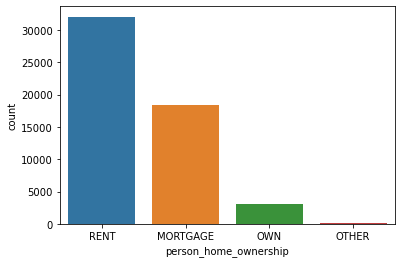

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


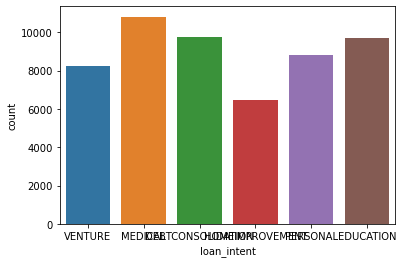

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


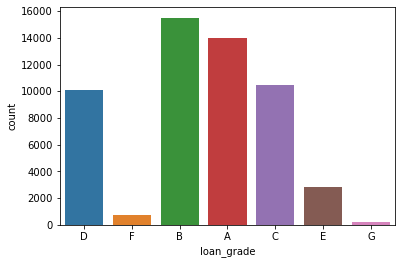

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


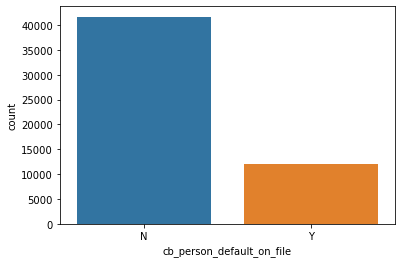

In [29]:
cat = [	'person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
for var in cat:
    plt.figure()
    plt.clf()
    sns.countplot(data[var])
    plt.show()

In [30]:
data.describe(include = ["number"])       #identifying Continuous or numerical Variables

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,53809.000000,5.380900e+04,53809.000000,53809.000000,53809.000000,53809.000000,53809.000000
mean,27.589808,5.924015e+04,4.530812,10093.708766,11.822721,0.529484,5.741047
std,6.184376,4.701136e+04,3.930653,6674.723992,3.245685,0.499135,4.060628
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.399600e+04,2.000000,5000.000000,9.630000,0.000000,3.000000
50%,26.000000,5.000000e+04,4.000000,8500.000000,11.822717,1.000000,4.000000
75%,30.000000,7.200000e+04,6.000000,14000.000000,14.220000,1.000000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,30.000000


#### One - hot encoding 

In [32]:
data = pd.get_dummies(data, columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
2068,24,13288,5.000000,2400,17.270000,1,2,0,0,0,...,1,0,0,0,1,0,0,0,1,0
23851,27,66300,1.000000,9600,11.822717,1,7,0,0,0,...,0,0,0,0,1,0,0,0,1,0
22975,28,32376,2.000000,8000,11.822717,1,7,0,0,0,...,0,0,0,0,0,0,1,0,0,1
22841,28,24000,4.537466,7950,15.990000,1,5,0,0,0,...,0,0,0,0,1,0,0,0,1,0
16653,25,19200,5.000000,4000,11.822717,1,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0


##### Train Test Split

In [33]:
X = data.drop(['loan_status'],axis=1)   # predictor variables
y = data['loan_status']                 # Target variables

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify=data['loan_status'])

In [35]:
y_train.value_counts(normalize=True)

1    0.529491
0    0.470509
Name: loan_status, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

1    0.529455
0    0.470545
Name: loan_status, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify=data['loan_status'])

### Model Fitting - Logistic Classifier

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[3163 1901]
 [1056 4642]]
Accuracy :  0.7252369448057981


In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.485508
         Iterations: 35
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.298     
Dependent Variable:       loan_status          AIC:                  52293.3773
Date:                     2022-06-27 09:33     BIC:                  52489.0276
No. Observations:         53809                Log-Likelihood:       -26125.   
Df Model:                 21                   LL-Null:              -37204.   
Df Residuals:             53787                LLR p-value:          0.0000    
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
person_

C:\Users\91703\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      5064
           1       0.71      0.81      0.76      5698

    accuracy                           0.73     10762
   macro avg       0.73      0.72      0.72     10762
weighted avg       0.73      0.73      0.72     10762



### ROC Curve

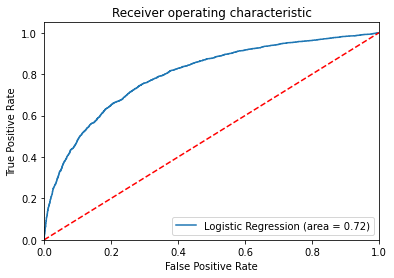

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()